## Clasificación Múltiple con el Dataset MINST

### Cargar el Dataset de MINST

IMportemos el mdoulo de MINST desde keras

In [3]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)


from tensorflow.keras.datasets import mnist

Carguemos los datos a nuestras tuplas clásicas de Train y test

In [2]:
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

### Exploración de Datos

Obten el Shape de XTrain

In [3]:
xtrain.shape

(60000, 28, 28)

Obten el Shape de yTrain

In [4]:
ytrain.shape

(60000,)

Obten el Shape de XTest

In [5]:
xtest.shape

(10000, 28, 28)

Obten el Shape de yTrain

In [6]:
ytest.shape

(10000,)

### Preparar los datos

Cambia la figura de Xtrain a 60000 x 28 x 28 x 1

In [7]:
xtrain = xtrain.reshape((60000,28,28,1))

Cambia la figura de Xshape a 10000 x 28 x 28 x 1

In [8]:
xtest = xtest.reshape((10000,28,28,1))

Normaliza con astype Xtrain

In [9]:
xtrain = xtrain.astype('float32')/255
xtest = xtest.astype('float32')/255

Desde tensorflow importa to_categorical

In [10]:
from tensorflow.keras.utils import to_categorical 

aplicalo a Y_train

In [11]:
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

Checa su shape

In [12]:
ytrain.shape

(60000, 10)

Checa el primer dato de Y_train

In [13]:
ytrain[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Crear la Red Neuronal

Importa Sequential desde tf

In [14]:
from tensorflow.keras.models import Sequential 

Crea tu objeto cnn

In [15]:
cnn = Sequential()

2023-03-01 12:23:26.883899: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-03-01 12:23:26.883946: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pop-os): /proc/driver/nvidia/version does not exist
2023-03-01 12:23:26.885459: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


importa las capas que necesitaras desde tf

In [16]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

agrega la capa de Conv2d

In [17]:
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))

Ahora agrega una capa de Pooling2d

In [18]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

Agrega otra caba de Conv2D

In [19]:
cnn.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))


Y otra de Pooling

In [20]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

Aplana los resultados

In [21]:
cnn.add(Flatten())

Agrega una capa DENSE

In [22]:
cnn.add(Dense(units=128, activation='relu'))

Y otra DENSE

In [23]:
cnn.add(Dense(units=10, activation='softmax'))

Imprime el resultado en un resumen

In [24]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

Visualiza la estructura del modelo

In [28]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

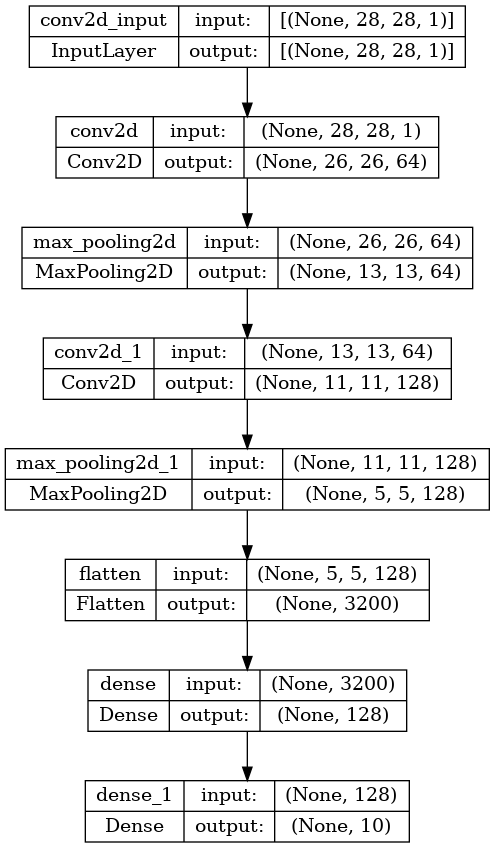

In [33]:
plot_model(cnn,to_file='covnet.png', show_shapes=True, show_layer_names=True)
# Image(filename='covnet.png')

Compila tu modelo

In [37]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Entrenar y Evaluar el modelo

Entrena tu modelo con fit

In [38]:
cnn.fit(xtrain, ytrain, epochs=8, batch_size=64, validation_split=0.1)

Epoch 1/8
844/844 [==============================] - 65s 75ms/step - loss: 0.1403 - accuracy: 0.9569 - val_loss: 0.0441 - val_accuracy: 0.9878
Epoch 2/8
844/844 [==============================] - 62s 74ms/step - loss: 0.0425 - accuracy: 0.9863 - val_loss: 0.0408 - val_accuracy: 0.9893
Epoch 3/8
844/844 [==============================] - 73s 87ms/step - loss: 0.0286 - accuracy: 0.9910 - val_loss: 0.0314 - val_accuracy: 0.9913
Epoch 4/8
844/844 [==============================] - 79s 94ms/step - loss: 0.0201 - accuracy: 0.9934 - val_loss: 0.0312 - val_accuracy: 0.9920
Epoch 5/8
844/844 [==============================] - 74s 88ms/step - loss: 0.0154 - accuracy: 0.9951 - val_loss: 0.0366 - val_accuracy: 0.9917
Epoch 6/8
844/844 [==============================] - 75s 88ms/step - loss: 0.0119 - accuracy: 0.9961 - val_loss: 0.0373 - val_accuracy: 0.9907
Epoch 7/8
844/844 [==============================] - 67s 79ms/step - loss: 0.0105 - accuracy: 0.9966 - val_loss: 0.0332 - val_accuracy: 0.9922

Evalua le modelo con Evaluate

In [39]:
loss, accuracy = cnn.evaluate(xtest, ytest)

313/313 [==============================] - 5s 17ms/step - loss: 0.0309 - accuracy: 0.9920


In [40]:
print(f'{loss}  acc:{accuracy}')

0.03086194209754467  acc:0.9919999837875366


Vamos a hacer predicciones

In [41]:
predicciones = cnn.predict(xtest)

313/313 [==============================] - 5s 16ms/step


checa que dice el primer elemento de ytest

In [42]:
ytest[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

Y ahora que dice el primer elemento del modelo

In [50]:
for index, prob in enumerate(predicciones[0]):
    print(f'{index}: {prob: .1%}')

0:  0.0%
1:  0.0%
2:  0.0%
3:  0.0%
4:  0.0%
5:  0.0%
6:  0.0%
7:  100.0%
8:  0.0%
9:  0.0%


Ubiquemos las predicciones incorreectas

In [51]:
import numpy as np

In [52]:
ims=xtest.reshape(10000,28,28)
predicciones_incorrectas=[]

In [54]:
for i , (p,e) in enumerate(zip(predicciones, ytest)):
    predecido, esperado = np.argmax(p), np.argmax(e)
    if predecido != esperado:
        predicciones_incorrectas.append((i, ims[i], predecido, esperado))

Obten el largo de esa lista

In [55]:
len(predicciones_incorrectas)

80

Visualiza las predicciones incorrectas

In [58]:
import matplotlib.pyplot as plt

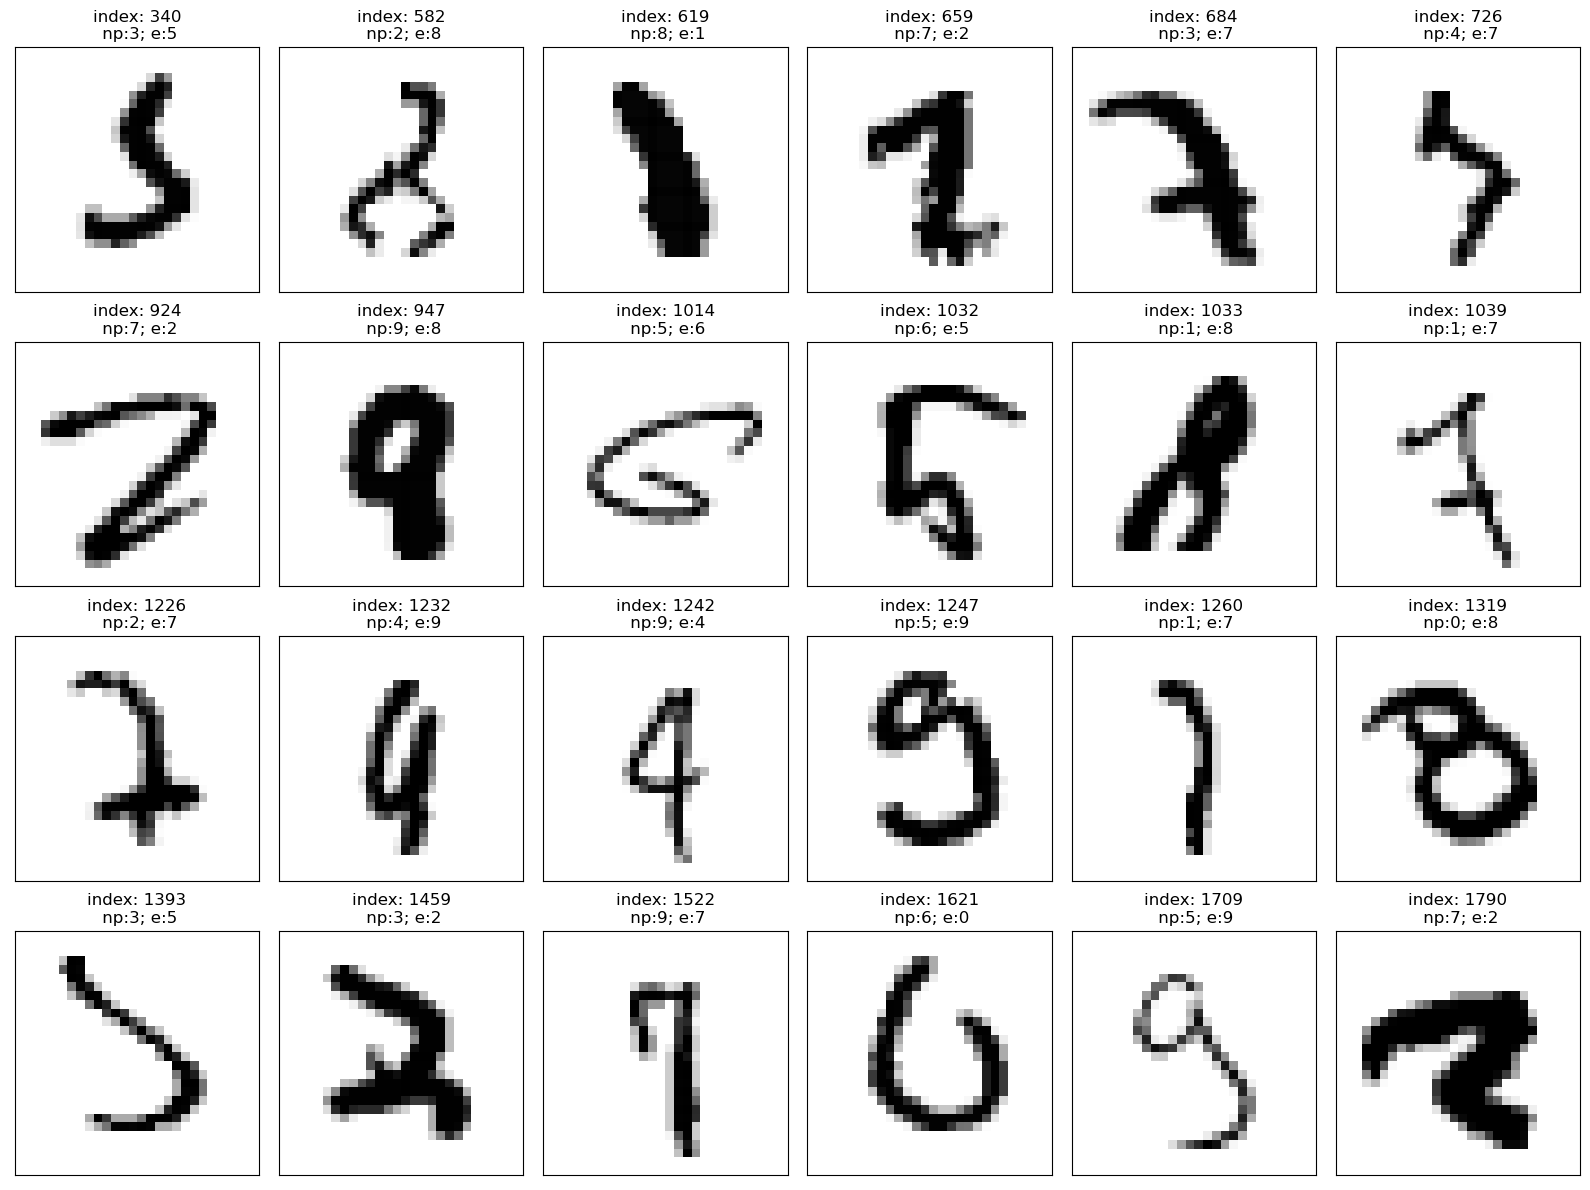

In [60]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16,12))
for axes, item in zip(axes.ravel(), predicciones_incorrectas):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(f'index: {index}\n np:{predicted}; e:{expected}')
plt.tight_layout()

Arma una funcion que genere un listado de las probabilidades para predicciones incorrectas

In [61]:
def verProbabilidades(pred):
    for i, prob in enumerate(pred):
        print(f'{i}: {prob: 0.1%}')

Muestra una que otra predicción incorrecta a detalles

In [62]:
verProbabilidades(predicciones[340])

0:  0.0%
1:  0.0%
2:  0.0%
3:  91.0%
4:  0.0%
5:  9.0%
6:  0.0%
7:  0.0%
8:  0.0%
9:  0.0%


### Guardar tu Modelo

In [63]:
cnn.save('cnn_mnist.h5')

In [4]:
from tensorflow.keras.models import load_model

In [5]:
cnn = load_model('cnn_mnist.h5')

## Analisis de Sentimientos con Redes Neuronales - IMDB

### Cargar el dataset de IMBD

Import el dataset de imdb desde tensorlfow.keras.datasets

In [7]:
from tensorflow.keras.datasets import imdb

Carga las 10000 palabras que mas ocurren

In [9]:
numero_palabras = 10000

Carga tus palabras en tus datasets X_train y X_test y asi

In [10]:
(xtrain, ytrain),(xtest, ytest) = imdb.load_data(num_words=numero_palabras)

17464789/17464789 [==============================] - 2s 0us/step


### Exploracion de Datos

Figura de X_train

In [11]:
xtrain.shape

(25000,)

Figura de Y_train

In [12]:
ytrain.shape

(25000,)

Figura de X_test

In [13]:
xtest.shape

(25000,)

Figura de y_test

In [14]:
ytest.shape

(25000,)

Apaga pretty print

In [18]:
%pprint

Pretty printing has been turned OFF


Checa un elemento cualquiera de X_train

In [19]:
xtrain[0]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]

Llama la función word to index

In [20]:
word_to_index = imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


Checa el indice de la palabra "bad"

In [21]:
word_to_index['bad']

75

Reversa el mapeo del diccionario Word to INdex a Index to Word

In [25]:
index_to_word = {index:word for (word,index) in word_to_index.items()}

Armate una lista para revisar las 50 palabras mas comunes en el diccionario

In [27]:
[index_to_word[i] for i in range(1,51)]


['the', 'and', 'a', 'of', 'to', 'is', 'br', 'in', 'it', 'i', 'this', 'that', 'was', 'as', 'for', 'with', 'movie', 'but', 'film', 'on', 'not', 'you', 'are', 'his', 'have', 'he', 'be', 'one', 'all', 'at', 'by', 'an', 'they', 'who', 'so', 'from', 'like', 'her', 'or', 'just', 'about', "it's", 'out', 'has', 'if', 'some', 'there', 'what', 'good', 'more']

Ok, ya estamos listos para leer una reseña

In [28]:
' '.join([index_to_word.get(i-3,'?') for i in xtrain[123]])

'? beautiful and touching movie rich colors great settings good acting and one of the most charming movies i have seen in a while i never saw such an interesting setting when i was in china my wife liked it so much she asked me to ? on and rate it so other would enjoy too'

Y revisa de Y_train la clasificacion de esta reseña

In [29]:
ytrain[123]

1

### Preparación de datos

Define palabras_por_reseña en 200

In [30]:
numpal = 200

Importa pad_sequences de tensroflow

In [32]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

Define X_train como pad_sequences del viejo X_train

In [33]:
xtrain = pad_sequences(xtrain, maxlen=numpal)

Checa el nuevo shape de X_train

In [34]:
xtrain.shape

(25000, 200)

Hay que reconfigurar X_Test tambien

In [35]:
xtest = pad_sequences(xtest, maxlen=numpal)

Checa su figura

In [36]:
xtest.shape

(25000, 200)

Importa el Train_test_split y definelo sobre tus variables, semilla 11 y tamaño de prueba de .20

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
xtest, xval, ytest, yval = train_test_split(xtest, ytest, random_state=11, test_size=0.2)

Checa la figura de xtest

In [39]:
xtest.shape

(20000, 200)

Y la de XVal

In [40]:
xval.shape

(5000, 200)

### Crear la red neuronal

Desde Tensorflow importa Sequencial

In [41]:
from tensorflow.keras.models import Sequential

arma el objeto rnn com oun sequential

In [42]:
rnn = Sequential()

Importa las capas Dense y LSTM

In [43]:
from tensorflow.keras.layers import Dense, LSTM

Importa Embedding

In [46]:
import tensorflow as tf

Agrega la capa de Embedding, que salgan 128 dimensiones

In [48]:
rnn.add(tf.keras.layers.Embedding(input_dim=numero_palabras, output_dim=128, input_length=numpal))

agrega la capa de LSTM

In [49]:
rnn.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))

Agrega una capa DENSE

In [50]:
rnn.add(Dense(units=1, activation='sigmoid'))

Compila el RNN

In [51]:
rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Y resvisa el resultado de RNN

In [52]:
rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,411,713
Trainable params: 1,411,713
Non-trainable params: 0
_________________________________________________________________


### Entrenar y evaluar el modelo

Usa Fit para entrenar el mdoelo

In [53]:
rnn.fit(xtrain, ytrain, epochs=6, batch_size=32, validation_data=(xtest, ytest))

Epoch 1/6
782/782 [==============================] - 365s 460ms/step - loss: 0.4128 - accuracy: 0.8079 - val_loss: 0.7225 - val_accuracy: 0.7355
Epoch 2/6
782/782 [==============================] - 361s 461ms/step - loss: 0.2802 - accuracy: 0.8886 - val_loss: 0.3849 - val_accuracy: 0.8530
Epoch 3/6
782/782 [==============================] - 453s 580ms/step - loss: 0.2011 - accuracy: 0.9248 - val_loss: 0.3394 - val_accuracy: 0.8619
Epoch 4/6
782/782 [==============================] - 374s 478ms/step - loss: 0.2131 - accuracy: 0.9163 - val_loss: 0.3805 - val_accuracy: 0.8604
Epoch 5/6
782/782 [==============================] - 424s 542ms/step - loss: 0.1346 - accuracy: 0.9510 - val_loss: 0.4428 - val_accuracy: 0.8538
Epoch 6/6
782/782 [==============================] - 409s 524ms/step - loss: 0.0976 - accuracy: 0.9653 - val_loss: 0.4860 - val_accuracy: 0.8510


Checa tus resultados

In [ ]:
rnn.evaluate(xtest, ytest)

In [54]:
rnn.save('rnn_imdb.h5')